In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score ,recall_score
from sklearn.metrics import f1_score
from sklearn import metrics 

In [2]:
# csv file data_reading
tt_train=pd.read_csv("/content/titanic_train.csv")

In [3]:
tt_train.shape

(891, 12)

In [4]:
tt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#counting values present in particular column
tt_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
tt_train.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [7]:
tt_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
tt_train.Embarked.value_counts().isnull()

S    False
C    False
Q    False
Name: Embarked, dtype: bool

In [9]:
# % of null values or mean of (null values present in data set)
tt_train.isnull().mean()  

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
tt_train=tt_train.drop("Cabin",axis=1)

In [11]:
#removing insignificant columns 
tt_train=tt_train.drop(["Ticket","PassengerId","Name"],axis=1)

In [12]:
# function_created to fill missing values based on mean/mode of each pclass values
def age_approx(cols):
  Age=cols[0]
  Pclass=cols[1]
  if  pd.isnull(Age):
       if Pclass==1:
           return 37
       elif Pclass==2:
             return 29
       else :
              return 24
  else:
        return Age

In [13]:
tt_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [14]:
# using age_approx to fill nan values
tt_train['Age']=tt_train[["Age","Pclass"]].apply(age_approx,axis=1)

In [15]:
tt_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
tt_train.dropna(inplace=True)

In [17]:
tt_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
tt_train.shape

(889, 8)

In [19]:
tt_train_dummied=pd.get_dummies(tt_train,columns=['Sex'])

In [20]:
tt_train_dummied=pd.get_dummies(tt_train_dummied,columns=["Embarked"])

In [21]:
tt_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

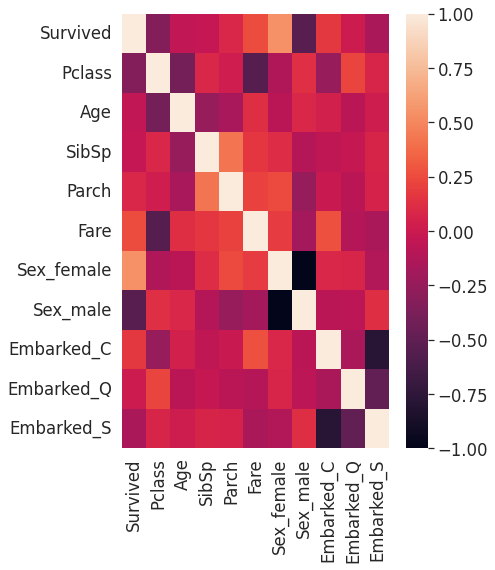

In [22]:
# checking corr of features with each-others
plt.figure(figsize=(6,8))
sns.heatmap(tt_train_dummied.corr())

In [23]:
uses_features=["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

In [24]:
x=tt_train_dummied[uses_features].values
y=tt_train_dummied["Survived"]

In [30]:
# spliting data into test,train datasets
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)

In [31]:
print(x_train.shape)

(622, 9)


In [32]:
print(x_test.shape)

(267, 9)


In [33]:
#using logistc_regression
log_reg=LogisticRegression()

In [34]:
# fitting vlues in our logistic_regression model
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred_y=log_reg.predict(x_test)

In [36]:
# values confusion_matrix
metrics.confusion_matrix(y_test,pred_y)

array([[143,  23],
       [ 22,  79]])

In [38]:
# accuracy checking
metrics.accuracy_score(y_test,pred_y)

0.8314606741573034

In [41]:
#classification_report
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [42]:
log_reg.coef_

array([[-1.04114276, -0.03978964, -0.24192014, -0.04083551,  1.20988747,
        -1.17825117,  0.3591641 , -0.02652942, -0.30099837]])

In [43]:
log_reg.intercept_

array([3.62417807])

In [44]:
tt_train_dummied[uses_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [46]:
log_reg.predict_proba(x_test)

array([[0.26534805, 0.73465195],
       [0.39640574, 0.60359426],
       [0.94727015, 0.05272985],
       [0.25971055, 0.74028945],
       [0.94410838, 0.05589162],
       [0.13501028, 0.86498972],
       [0.33327153, 0.66672847],
       [0.51934004, 0.48065996],
       [0.7820268 , 0.2179732 ],
       [0.40730729, 0.59269271],
       [0.73978569, 0.26021431],
       [0.21202666, 0.78797334],
       [0.74861829, 0.25138171],
       [0.14592238, 0.85407762],
       [0.86458107, 0.13541893],
       [0.3695223 , 0.6304777 ],
       [0.89366781, 0.10633219],
       [0.29750737, 0.70249263],
       [0.17621106, 0.82378894],
       [0.39941143, 0.60058857],
       [0.90480296, 0.09519704],
       [0.5529148 , 0.4470852 ],
       [0.86417901, 0.13582099],
       [0.93746527, 0.06253473],
       [0.51658775, 0.48341225],
       [0.51563938, 0.48436062],
       [0.03927366, 0.96072634],
       [0.86917246, 0.13082754],
       [0.89801595, 0.10198405],
       [0.32537988, 0.67462012],
       [0.